In [0]:
from fastai.collab import *
from fastai.tabular import *

**Collaborative filtering example**


collab models use data in a DataFrame of user, items, and ratings.

In [0]:
user,item,title = 'userId','movieId','title'

In [4]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [5]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
# seed is probably used to distribute data between train and valid
data = CollabDataBunch.from_df(ratings, seed=42)

In [7]:
data

TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 73; movieId 1097; ,userId 561; movieId 924; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; 
y: FloatList
4.0,3.5,3.5,5.0,2.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 306; movieId 2628; ,userId 605; movieId 3793; ,userId 313; movieId 4886; ,userId 468; movieId 1136; ,userId 380; movieId 539; 
y: FloatList
3.0,2.0,4.5,4.0,1.5
Path: .;

Test: None

In [0]:
# WHat y_range? 

y_range = [0,5.5]

In [0]:
# What n_factor
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [10]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.619715,0.942220,00:00
1,0.851900,0.681827,00:00
2,0.655334,0.669758,00:00


**Movielens 100k**

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [11]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path='/content/gdrive/My Drive/DataSets/MOVIE_LENS/ml-100k'

In [18]:
# What u.data
ratings = pd.read_csv(path+'/u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [25]:
# WHat u.item, N, *[f'g{i}' for i in range(19)]

movies = pd.read_csv(path+'/u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [23]:
len(ratings)

100000

In [30]:
doc (ratings.merge)

In [31]:
# What ratings.merge(movies[[item, title]])

# Most probably applying Join operation using movieid as item and title

# The purpose was just to bring movie name (from the movies part) in data i.e to get a data having rating of movies wither their id's and title and userId

rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
# WHat item_name

# most probably item_name should be feature

# Where dependent var
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [33]:
data.show_batch()

userId,title,target
405,"Thin Blue Line, The (1988)",3.0
763,Amadeus (1984),4.0
854,Some Like It Hot (1959),3.0
651,Cold Comfort Farm (1995),2.0
886,Dead Man Walking (1995),5.0


In [0]:
y_range = [0,5.5]

In [0]:
# What n_factors
# What wd

# Most probably wd = weight decay, L2 regularization
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


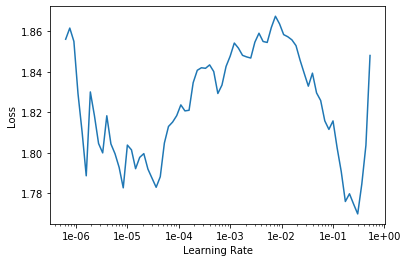

In [36]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
learn.destroy

In [40]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.909938,0.951564,00:09
1,0.875454,0.878361,00:09
2,0.769198,0.835716,00:09
3,0.645937,0.817779,00:09
4,0.544438,0.817510,00:09


In [0]:
learn.save('dotprod')

**Interpretation**

**SETUP**

In [0]:
learn.load('dotprod');

In [44]:
# What learn.model

# What EmbeddingDotBias


learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [47]:
# What g (also note count)

g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

**Movie Bias**

In [48]:
# What

movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
# WHat movie_ratings

mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
# What
# How

item0 = lambda o:o[0]

In [51]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3632),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2987),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2968), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2647), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2503), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2442), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2422), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2327), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2290), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2229), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2216), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2210), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2198), "Stephen King's The Langoliers (1995)", 2.413793103448276),
 (tensor(-0.2145), 'Showgirls (1995)', 1.9565217391304348),
 (ten

In [52]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6152), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5910), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5665), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5489), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5399), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5341), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5196), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5196), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4869), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667),
 (tensor(0.4843), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4800), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4726), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4634), 'To Kill a Mockingbird (1962)', 4.292237442922374),
 (tensor(0.4602), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4491), 'Apt Pupil (1998)', 4.1)]

In [54]:
# What

movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [55]:
# What pca

movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [56]:
movie_pca

tensor([[-0.7408, -0.8743, -0.7233],
        [-0.1202, -0.3147,  0.0848],
        [-0.8452,  0.2322, -0.0853],
        ...,
        [ 0.1912,  0.3465,  0.0663],
        [ 0.5786,  0.3956,  0.1251],
        [ 0.4810, -0.1569, -0.0441]])

In [0]:
# What

fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [63]:
# What key

sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2953), "McHale's Navy (1997)"),
 (tensor(1.2154), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.2078), 'Home Alone 3 (1997)'),
 (tensor(1.1803), 'Leave It to Beaver (1997)'),
 (tensor(1.1676), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1671), 'Jungle2Jungle (1997)'),
 (tensor(1.0996), 'Bio-Dome (1996)'),
 (tensor(1.0867), 'Grease 2 (1982)'),
 (tensor(1.0597), 'Mortal Kombat: Annihilation (1997)'),
 (tensor(1.0561), 'Hellraiser: Bloodline (1996)')]

In [64]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.0969), 'Close Shave, A (1995)'),
 (tensor(-1.0617), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0444), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-1.0247), 'Casablanca (1942)'),
 (tensor(-0.9957), 'Chinatown (1974)'),
 (tensor(-0.9559), '12 Angry Men (1957)'),
 (tensor(-0.9554), 'Some Folks Call It a Sling Blade (1993)'),
 (tensor(-0.9550), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9447), 'Godfather, The (1972)'),
 (tensor(-0.9232), 'Secrets & Lies (1996)')]

In [0]:
# What

movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [66]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8876), 'Keys to Tulsa (1997)'),
 (tensor(0.8343), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.7922), 'Trainspotting (1996)'),
 (tensor(0.7586), 'Sweet Hereafter, The (1997)'),
 (tensor(0.7584), 'Jude (1996)'),
 (tensor(0.7503), 'Rosencrantz and Guildenstern Are Dead (1990)'),
 (tensor(0.7472), 'Clockwork Orange, A (1971)'),
 (tensor(0.7361), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7340), 'Dead Man (1995)'),
 (tensor(0.7237), 'Cable Guy, The (1996)')]

In [67]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1619), 'Braveheart (1995)'),
 (tensor(-1.1550), 'Raiders of the Lost Ark (1981)'),
 (tensor(-1.1506), 'Titanic (1997)'),
 (tensor(-0.9251), "It's a Wonderful Life (1946)"),
 (tensor(-0.8875), 'Forrest Gump (1994)'),
 (tensor(-0.8743), 'Star Wars (1977)'),
 (tensor(-0.8625), 'American President, The (1995)'),
 (tensor(-0.8460), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8369), 'Top Gun (1986)'),
 (tensor(-0.8259), "Mr. Holland's Opus (1995)")]

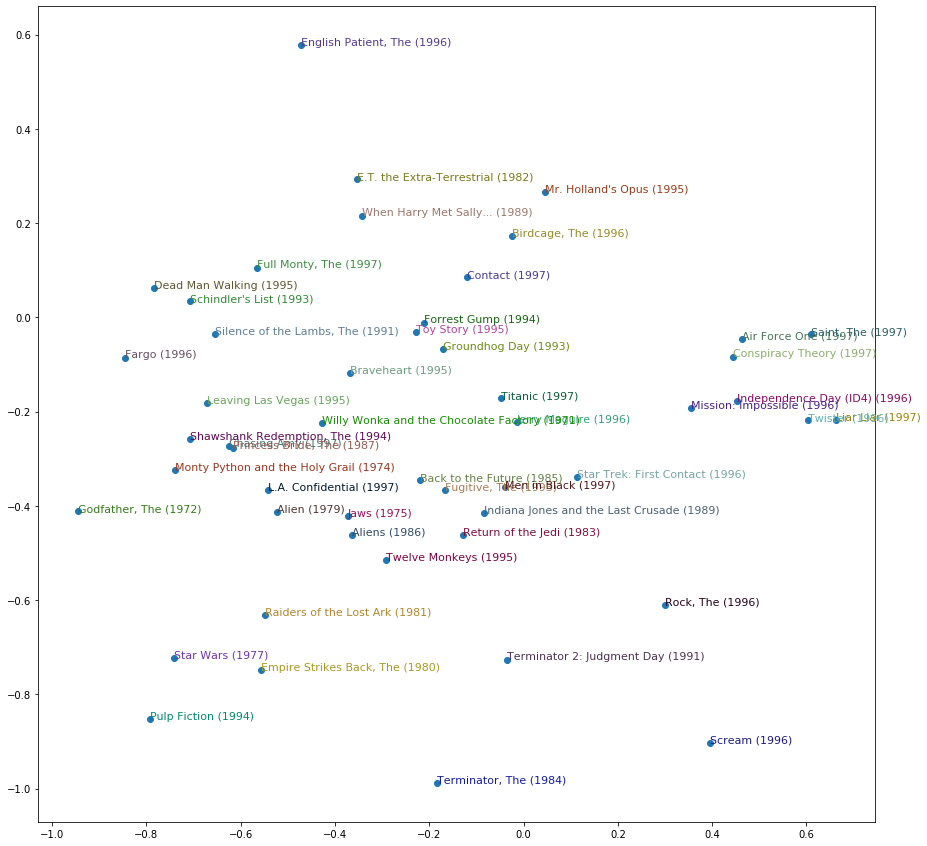

In [68]:
# What
# Why


idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()